In [1]:
import json
import numpy as np
from pickle import load

In [2]:
with open("../Datos/Procesados/jsons/alphapose/halpe26/A/alphapose-results.json", 'r') as f:
    halpe2d_json = json.load(f)

with open("../Datos/Procesados/results_3d/alphapose/halpe26/A/X3D.npy", 'rb') as f:
    halpe3d = np.load(f)

with open("../Datos/Procesados/results_3d/alphapose/halpe26/pixel/A/X3D.npy", 'rb') as f:
    halpe3d_pixel = np.load(f)

In [3]:
halpe2d = np.empty(halpe3d.shape, dtype=np.float32)
for i, frame in enumerate(halpe2d_json):
    halpe2d[i] = np.array(frame['keypoints']).reshape(-1, 3)[[19, 12, 14, 16, 11, 13, 15, 18, 18, 0, 17, 5, 7, 9, 6, 8, 10]]
    halpe2d[i, 7] += halpe2d[i, 0]
    halpe2d[i, 7] /= 2

In [4]:
halpe2d[0]

array([[1.57744781e+02, 2.32066269e+02, 8.06337953e-01],
       [1.24176163e+02, 2.34464035e+02, 8.54306817e-01],
       [9.06075363e+01, 2.22475235e+02, 4.42141891e-02],
       [8.34142609e+01, 2.36861786e+02, 3.90900344e-01],
       [1.96108932e+02, 2.34464035e+02, 8.84696305e-01],
       [2.10495483e+02, 2.32066269e+02, 5.96602485e-02],
       [2.32075317e+02, 2.34464035e+02, 2.30451122e-01],
       [1.60142548e+02, 1.68525665e+02, 8.56333196e-01],
       [1.62540298e+02, 1.04985046e+02, 9.06328440e-01],
       [1.60142548e+02, 6.66209030e+01, 9.40821052e-01],
       [1.62540298e+02, 2.34612408e+01, 9.44484591e-01],
       [2.15291000e+02, 1.33758148e+02, 9.28619981e-01],
       [2.32075317e+02, 2.22475235e+02, 8.70064020e-01],
       [2.34473068e+02, 2.41657303e+02, 6.00588620e-01],
       [1.07391846e+02, 1.31360397e+02, 9.05811906e-01],
       [8.58120193e+01, 2.17679718e+02, 8.41052532e-01],
       [8.10164948e+01, 2.36861786e+02, 7.42394745e-01]], dtype=float32)

In [5]:
def crop_scale(motion):
    '''
        Motion: [(M), T, 17, 3].
        Normalize to [-1, 1]
    '''
    result = motion.copy()
    valid_coords = motion[motion[..., 2]!=0][:,:2]
    if len(valid_coords) < 4:
        return np.zeros(motion.shape)
    xmin = min(valid_coords[:,0])
    xmax = max(valid_coords[:,0])
    ymin = min(valid_coords[:,1])
    ymax = max(valid_coords[:,1])
    scale = max(xmax-xmin, ymax-ymin)
    if scale==0:
        return np.zeros(motion.shape)
    xs = (xmin+xmax-scale) / 2
    ys = (ymin+ymax-scale) / 2
    result[...,:2] = (motion[..., :2]- [xs,ys]) / scale
    result[...,:2] = (result[..., :2] - 0.5) * 2
    result = np.clip(result, -1, 1)
    return result

In [6]:
halpe2d_cropped = crop_scale(halpe2d)

In [7]:
halpe2d_cropped[0]

array([[ 0.05128634,  0.88905966,  0.80633795],
       [-0.24935138,  0.9105338 ,  0.8543068 ],
       [-0.54998916,  0.8031632 ,  0.04421419],
       [-0.61441153,  0.9320079 ,  0.39090034],
       [ 0.39487243,  0.9105338 ,  0.8846963 ],
       [ 0.52371716,  0.88905966,  0.05966025],
       [ 0.7169844 ,  0.9105338 ,  0.23045112],
       [ 0.07276058,  0.3199954 ,  0.8563332 ],
       [ 0.09423459, -0.24906904,  0.90632844],
       [ 0.07276058, -0.59265506,  0.94082105],
       [ 0.09423459, -0.97918934,  0.9444846 ],
       [ 0.5666654 ,  0.00862038,  0.92862   ],
       [ 0.7169844 ,  0.8031632 ,  0.870064  ],
       [ 0.7384584 ,  0.97495615,  0.6005886 ],
       [-0.3996703 , -0.01285362,  0.9058119 ],
       [-0.5929374 ,  0.7602149 ,  0.84105253],
       [-0.6358857 ,  0.9320079 ,  0.74239475]], dtype=float32)

In [8]:
halpe3d[0]

array([[ 0.05963758,  0.81864667,  0.        ],
       [-0.22766   ,  0.8538568 , -0.10139433],
       [-0.40781373,  0.8801993 ,  0.08761312],
       [-0.60675204,  0.93252546,  0.15098938],
       [ 0.36222288,  0.8560615 , -0.09791792],
       [ 0.48674995,  0.8788916 ,  0.08312117],
       [ 0.7023212 ,  0.8924159 ,  0.1405103 ],
       [ 0.06676464,  0.2791608 , -0.08381096],
       [ 0.08456329, -0.3007299 , -0.12423027],
       [ 0.0765342 , -0.7174183 , -0.18995234],
       [ 0.09490815, -1.0854301 , -0.24534321],
       [ 0.58920085, -0.0544281 , -0.14289953],
       [ 0.67426986,  0.7433876 , -0.14334205],
       [ 0.68755054,  0.9096542 , -0.14362559],
       [-0.41725737, -0.07791302, -0.11904974],
       [-0.56929004,  0.7174626 , -0.1530468 ],
       [-0.5705734 ,  0.85539937, -0.16806018]], dtype=float32)

In [9]:
dif = halpe2d_cropped.copy()
dif[..., :2] -= halpe3d[..., :2]
np.abs(dif, out=dif)

array([[[0.00835124, 0.07041299, 0.80633795],
        [0.02169138, 0.05667698, 0.8543068 ],
        [0.14217544, 0.07703614, 0.04421419],
        ...,
        [0.01758707, 0.06505939, 0.9058119 ],
        [0.02364737, 0.04275233, 0.84105253],
        [0.06531233, 0.07660854, 0.74239475]],

       [[0.00584872, 0.06739736, 0.7924953 ],
        [0.01792578, 0.05406559, 0.8782067 ],
        [0.11777759, 0.020693  , 0.04519282],
        ...,
        [0.00262272, 0.06472878, 0.91245216],
        [0.02971488, 0.04258567, 0.85089475],
        [0.06160522, 0.09335786, 0.7347622 ]],

       [[0.00620822, 0.07118404, 0.7904289 ],
        [0.019099  , 0.05864853, 0.8707534 ],
        [0.10049736, 0.01973134, 0.04470025],
        ...,
        [0.00162932, 0.06533977, 0.9127468 ],
        [0.0241518 , 0.04955232, 0.8418302 ],
        [0.06519884, 0.09959304, 0.73961633]],

       ...,

       [[0.0071346 , 0.0638262 , 0.80426824],
        [0.01660837, 0.03722906, 0.8632943 ],
        [0.11758816, 0

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
df = pd.DataFrame(dif.reshape(-1, 3), columns=['x', 'y', 'p'], dtype=np.float32)
df.head()

,x,y,p
0,0.008351,0.070413,0.806338
1,0.021691,0.056677,0.854307
2,0.142175,0.077036,0.044214
3,0.007659,0.000518,0.390900
4,0.032650,0.054472,0.884696


<Axes: xlabel='p', ylabel='x'>

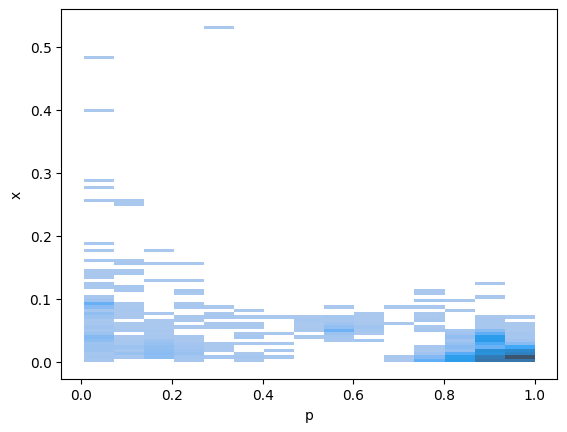

In [12]:
sns.histplot(df, x='p', y='x')

<Axes: xlabel='p', ylabel='y'>

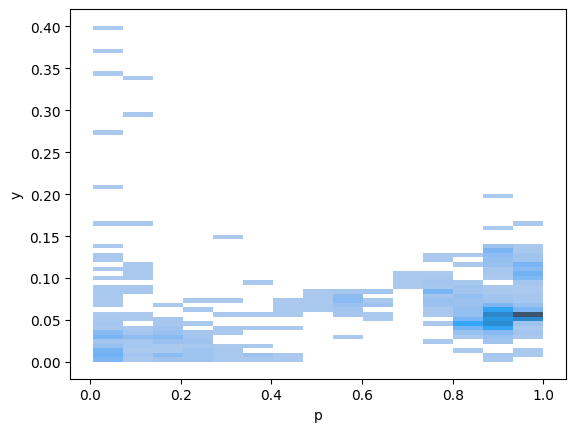

In [13]:
sns.histplot(df, x='p', y='y')

In [16]:
halpe2d[0]

array([[1.57744781e+02, 2.32066269e+02, 8.06337953e-01],
       [1.24176163e+02, 2.34464035e+02, 8.54306817e-01],
       [9.06075363e+01, 2.22475235e+02, 4.42141891e-02],
       [8.34142609e+01, 2.36861786e+02, 3.90900344e-01],
       [1.96108932e+02, 2.34464035e+02, 8.84696305e-01],
       [2.10495483e+02, 2.32066269e+02, 5.96602485e-02],
       [2.32075317e+02, 2.34464035e+02, 2.30451122e-01],
       [1.60142548e+02, 1.68525665e+02, 8.56333196e-01],
       [1.62540298e+02, 1.04985046e+02, 9.06328440e-01],
       [1.60142548e+02, 6.66209030e+01, 9.40821052e-01],
       [1.62540298e+02, 2.34612408e+01, 9.44484591e-01],
       [2.15291000e+02, 1.33758148e+02, 9.28619981e-01],
       [2.32075317e+02, 2.22475235e+02, 8.70064020e-01],
       [2.34473068e+02, 2.41657303e+02, 6.00588620e-01],
       [1.07391846e+02, 1.31360397e+02, 9.05811906e-01],
       [8.58120193e+01, 2.17679718e+02, 8.41052532e-01],
       [8.10164948e+01, 2.36861786e+02, 7.42394745e-01]], dtype=float32)

In [15]:
halpe3d_pixel[0]

array([[159.09488  , 222.26163  ,   0.       ],
       [127.120285 , 226.48367  , -12.051981 ],
       [107.145996 , 229.89948  ,   7.7318897],
       [ 85.232056 , 235.82056  ,  15.768174 ],
       [192.49483  , 226.80605  , -11.988323 ],
       [206.44746  , 231.15121  ,   8.829811 ],
       [231.15445  , 233.13872  ,  16.590103 ],
       [159.83032  , 163.86974  , -12.127426 ],
       [161.1702   ,  99.49866  , -13.714111 ],
       [159.7708   ,  54.620537 , -20.11952  ],
       [162.07425  ,   9.183472 , -27.18663  ],
       [216.49902  , 126.253746 , -15.80275  ],
       [227.0812   , 214.04749  , -17.784462 ],
       [229.1272   , 233.28055  , -18.867094 ],
       [105.610306 , 123.5724   , -15.007603 ],
       [ 89.15443  , 210.89737  , -19.004728 ],
       [ 89.37302  , 225.8185   , -21.98522  ]], dtype=float32)